In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
# import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
# from statsmodels.tools.eval_measures import rmse
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv(r'C:\Users\VARAD\LP3_ML\uber.csv')
df.drop(['Unnamed: 0','key'], axis=1,inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [4]:
df=df.iloc[:,[1,2,3,4,5,6,0]]
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
0,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,7.5
1,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,7.7
2,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,12.9
3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,5.3
4,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,16.0


In [5]:
df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
fare_amount          0
dtype: int64

In [6]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace = True)
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].median(),inplace = True)
df.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
dtype: int64

In [7]:
df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,-72.527638,39.935885,-72.525299,39.923890,1.684535,11.359955
std,11.437787,7.720539,13.117375,6.794812,1.385997,9.901776
min,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,-52.000000
25%,-73.992065,40.734796,-73.991407,40.733823,1.000000,6.000000
50%,-73.981823,40.752592,-73.980093,40.753042,1.000000,8.500000
75%,-73.967154,40.767158,-73.963659,40.768001,2.000000,12.500000
max,57.418457,1644.421482,1153.572603,872.697628,208.000000,499.000000


In [8]:
df.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
fare_amount          float64
dtype: object

In [9]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')
df.dtypes

pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
fare_amount                      float64
dtype: object

In [10]:
df= df.assign(hour = df.pickup_datetime.dt.hour,
             day= df.pickup_datetime.dt.day,
             month = df.pickup_datetime.dt.month,
             year = df.pickup_datetime.dt.year,
             dayofweek = df.pickup_datetime.dt.dayofweek)
df.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,hour,day,month,year,dayofweek
0,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7.5,19,7,5,2015,3
1,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,7.7,20,17,7,2009,4
2,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,12.9,21,24,8,2009,0
3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,5.3,8,26,6,2009,4
4,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,16.0,17,28,8,2014,3


In [11]:
df = df.drop('pickup_datetime',axis=1)

# **Checking outliers and filling them**

pickup_longitude        Axes(0.125,0.786098;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.786098;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.673415;0.352273x0.0939024)
passenger_count         Axes(0.125,0.560732;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

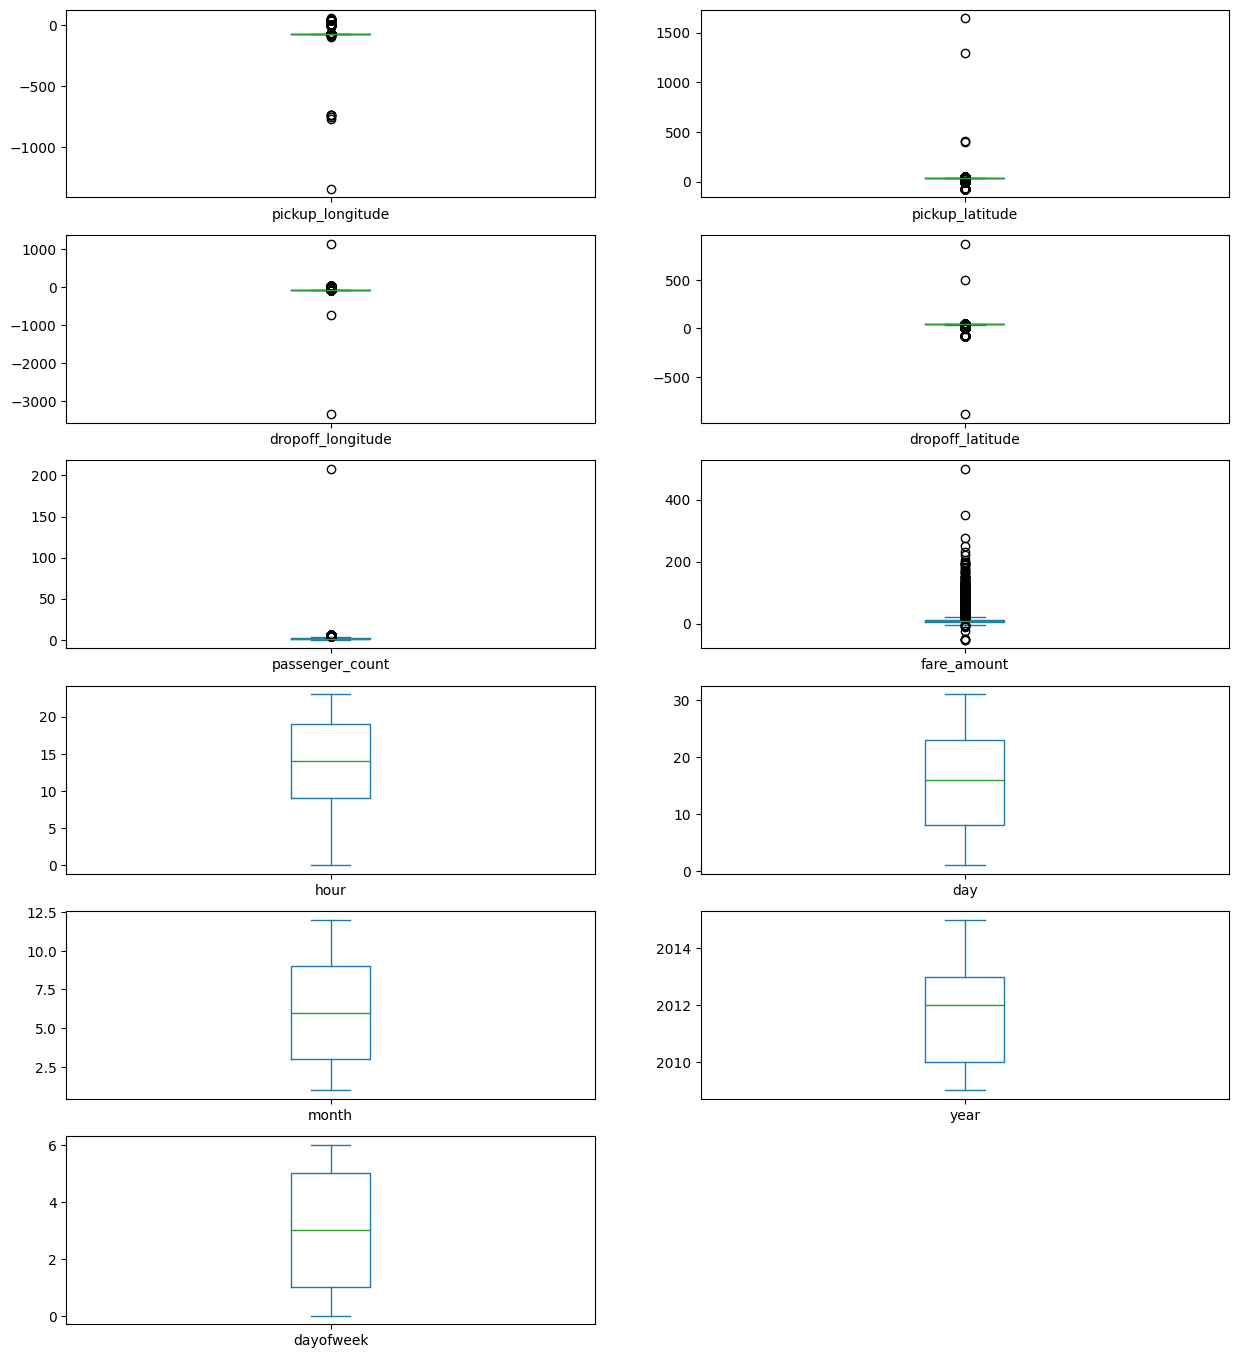

In [12]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [13]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1

In [14]:
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

pickup_longitude        Axes(0.125,0.786098;0.352273x0.0939024)
pickup_latitude      Axes(0.547727,0.786098;0.352273x0.0939024)
dropoff_longitude       Axes(0.125,0.673415;0.352273x0.0939024)
dropoff_latitude     Axes(0.547727,0.673415;0.352273x0.0939024)
passenger_count         Axes(0.125,0.560732;0.352273x0.0939024)
fare_amount          Axes(0.547727,0.560732;0.352273x0.0939024)
hour                    Axes(0.125,0.448049;0.352273x0.0939024)
day                  Axes(0.547727,0.448049;0.352273x0.0939024)
month                   Axes(0.125,0.335366;0.352273x0.0939024)
year                 Axes(0.547727,0.335366;0.352273x0.0939024)
dayofweek               Axes(0.125,0.222683;0.352273x0.0939024)
dtype: object

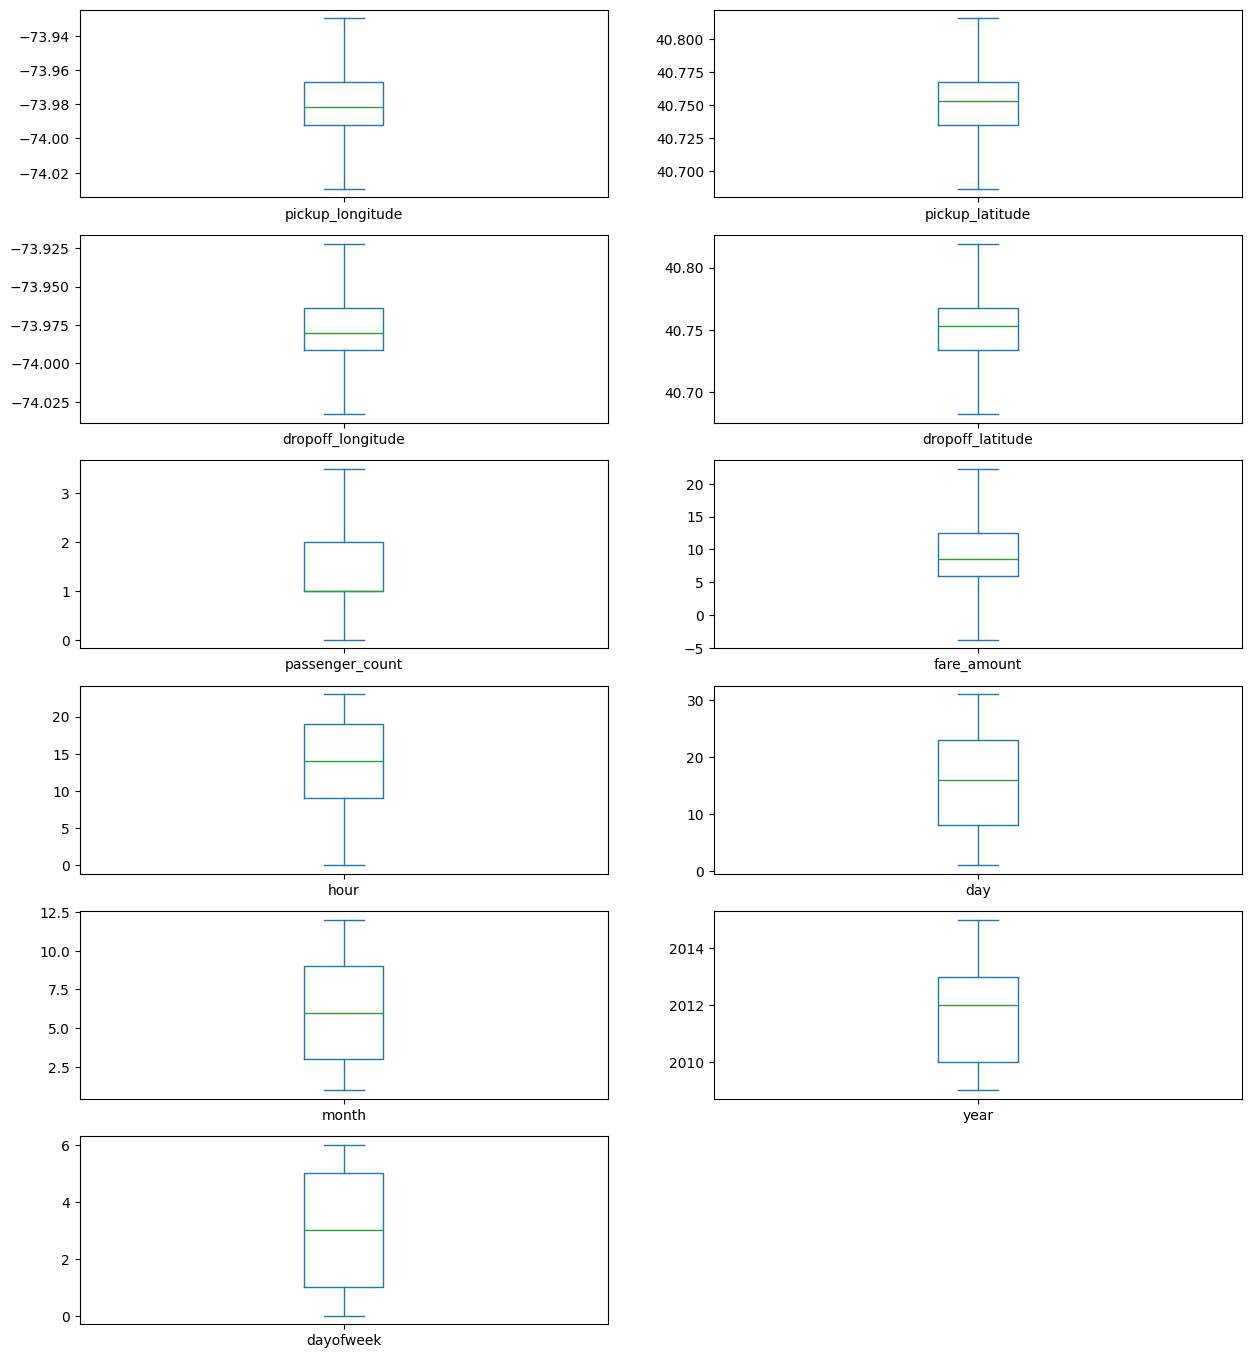

In [15]:
df = treat_outliers_all(df , df.iloc[: , 0::])
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))

In [16]:
!pip install haversine


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\VARAD\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [17]:
import haversine as hs

# **Calculate the distance using Haversine to calculate the distance between to points.**

In [18]:
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
        long1,lati1,long2,lati2 = [df['pickup_longitude'][pos],df['pickup_latitude'][pos],df['dropoff_longitude'][pos],df['dropoff_latitude'][pos]]
        loc1=(lati1,long1)
        loc2=(lati2,long2)
        c = hs.haversine(loc1,loc2)
        travel_dist.append(c)

print(travel_dist)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [19]:
df['dist_travel_km'] = travel_dist
df.head()
#Uber doesn't travel over 130 kms so minimize the distance
df= df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining observastions in the dataset:", df.shape)

Remaining observastions in the dataset: (200000, 12)


In [20]:
incorrect_coordinates = df.loc[(df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
 (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
 (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
 (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)]

In [21]:
df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,hour,day,month,year,dayofweek,dist_travel_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,7.5,19,7,5,2015,3,1.683325
1,-73.994355,40.728225,-73.994710,40.750325,1.0,7.7,20,17,7,2009,4,2.457593
2,-74.005043,40.740770,-73.962565,40.772647,1.0,12.9,21,24,8,2009,0,5.036384
3,-73.976124,40.790844,-73.965316,40.803349,3.0,5.3,8,26,6,2009,4,1.661686
4,-73.929786,40.744085,-73.973082,40.761247,3.5,16.0,17,28,8,2014,3,4.116088


In [22]:
df.isnull().sum()

pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
fare_amount          0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<Axes: >

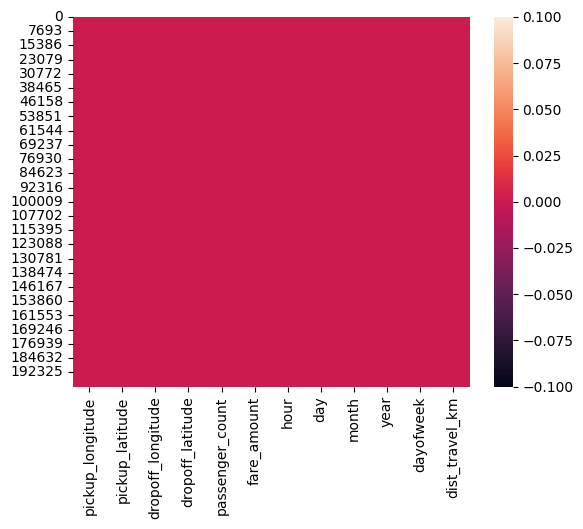

In [23]:
sns.heatmap(df.isnull())

In [24]:
corr = df.corr() #Function to find the correlation
corr

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare_amount,hour,day,month,year,dayofweek,dist_travel_km
pickup_longitude,1.000000,0.259497,0.425619,0.073290,-0.013213,0.154069,0.011579,-0.003204,0.001169,0.010198,-0.024652,0.048446
pickup_latitude,0.259497,1.000000,0.048889,0.515714,-0.012889,-0.110842,0.029681,-0.001553,0.001562,-0.014243,-0.042310,-0.073362
dropoff_longitude,0.425619,0.048889,1.000000,0.245667,-0.009303,0.218675,-0.046558,-0.004007,0.002391,0.011346,-0.003336,0.155191
dropoff_latitude,0.073290,0.515714,0.245667,1.000000,-0.006308,-0.125898,0.019783,-0.003479,-0.001193,-0.009603,-0.031919,-0.052701
passenger_count,-0.013213,-0.012889,-0.009303,-0.006308,1.000000,0.015778,0.020274,0.002712,0.010351,-0.009749,0.048550,0.009884
fare_amount,0.154069,-0.110842,0.218675,-0.125898,0.015778,1.000000,-0.023623,0.004534,0.030817,0.141277,0.013652,0.786385
hour,0.011579,0.029681,-0.046558,0.019783,0.020274,-0.023623,1.000000,0.004677,-0.003926,0.002156,-0.086947,-0.035708
day,-0.003204,-0.001553,-0.004007,-0.003479,0.002712,0.004534,0.004677,1.000000,-0.017360,-0.012170,0.005617,0.001709
month,0.001169,0.001562,0.002391,-0.001193,0.010351,0.030817,-0.003926,-0.017360,1.000000,-0.115859,-0.008786,0.010050
year,0.010198,-0.014243,0.011346,-0.009603,-0.009749,0.141277,0.002156,-0.012170,-0.115859,1.000000,0.006113,0.022294


<Axes: >

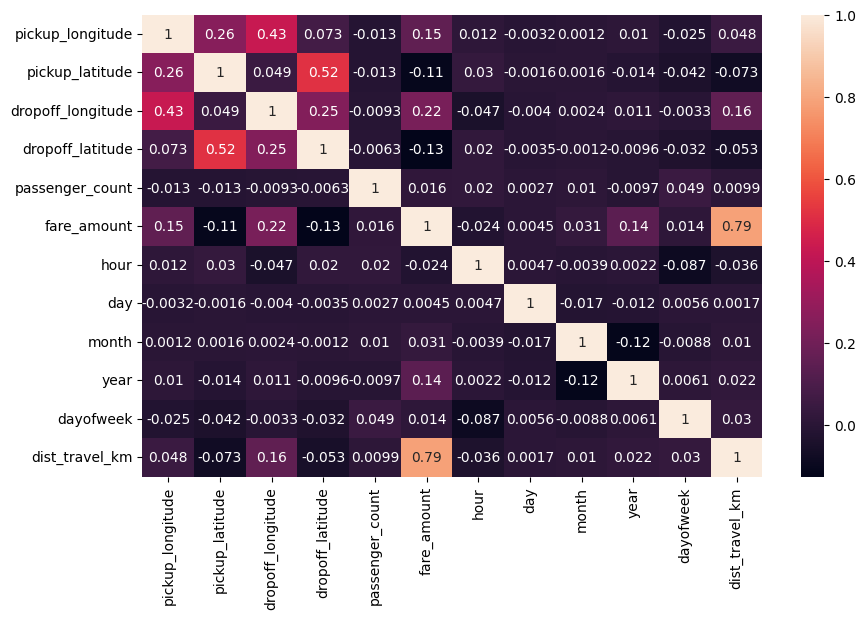

In [25]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

# **Dividing the dataset into feature and target values**

In [26]:
x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
y = df['fare_amount']

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

# **Linear Regression**

In [28]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)
regression.intercept_ #To find the linear intercept
regression.coef_ #To find the linear coeeficient
prediction = regression.predict(X_test) #To predict the target values
print(prediction)

[10.1642837   7.60751693  5.46606327 ...  6.13111456 10.7802557
  6.05704516]


In [29]:
y_test

29217      9.3
90474      8.9
138281     4.9
80446      8.5
111081     8.9
          ... 
11982      3.5
73407      5.3
2020       5.3
741       10.0
181125     7.3
Name: fare_amount, Length: 66000, dtype: float64

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction)

0.6664937098186958

In [31]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,prediction)
MSE

9.896125575432647

In [32]:
RMSE = np.sqrt(MSE)
RMSE

3.1458107977805416

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100) #Here n_estimators means number of trees you want to build before making the prediction
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred

In [34]:
R2_Random = r2_score(y_test,y_pred)
R2_Random

0.7970067300125626

In [35]:
MSE_Random = mean_squared_error(y_test,y_pred)
MSE_Random


6.023415299517478

In [36]:
RMSE_Random = np.sqrt(MSE_Random)
RMSE_Random

2.4542647166753384